## 서울특별시 공공자전거 따릉이 대여이력 분석

### Tidy Data 만들기와 시계열 데이터 분석하기

#### 데이터 출처 :
* 서울특별시 공공자전거 대여이력 정보
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1


## 사용할 도구 가져오기

In [2]:
# 데이터 분석을 위해 pandas를
# 수치계산을 위해 numpy를
# 시각화를 위해 seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns

## 시각화 도구 설정

In [42]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]


%matplotlib inline

## 데이터 불러오기
* 다음의 위치에서 2017년 대여 이력을 다운로드 합니다. 
    * https://drive.google.com/open?id=1ZQX0U6DnwKMVNWKnJghwUdt5iM89ZMa6

In [4]:
# read_csv를 통해 데이터를 불러옵니다.
# 데이터를 불러왔으면 shape를 통해 크기를 출력해 봅니다.
%time df = pd.read_csv('./seoul-bike-2017.csv', low_memory=False)
df.shape

Wall time: 15.7 s


(4975954, 11)

## 데이터 미리보기 및 요약하기

In [5]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-00230,2017-01-01 0:00,419,홈플러스 앞,5,2017-01-01 0:21,914,새절역 2번출구,18,20,3340
1,SPB-02803,2017-01-01 0:01,825,서빙고동 주민센터 앞,2,2017-01-01 0:15,822,이촌1동 마을공원,7,14,3380
2,SPB-03956,2017-01-01 0:05,906,연신내역 5번출구150M 아래,1,2017-01-01 0:16,931,역촌파출소,6,11,1610
3,SPB-02864,2017-01-01 0:05,906,연신내역 5번출구150M 아래,9,2017-01-01 0:29,912,응암오거리,1,24,3620
4,SPB-01388,2017-01-01 0:05,330,청계천 한빛광장,6,2017-01-01 0:23,171,임광빌딩 앞,9,17,2280


In [6]:
df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
4975949,SPB-09854,2017-12-31 23:58:55,549,아차산역 3번출구,9,2018-01-01 00:09:39,592,건국대학교 학생회관,12,10,2280
4975950,SPB-01013,2017-12-31 23:58:56,1404,동일로 지하차도,2,2018-01-01 00:33:01,1414,사가정역 1번출구,7,33,4070
4975951,SPB-03956,2017-12-31 23:59:00,341,혜화역 3번출구 뒤,2,2018-01-01 00:49:23,358,성대입구 사거리,8,49,7240
4975952,SPB-00296,2017-12-31 23:59:46,1211,방이삼거리,1,2018-01-01 00:07:18,1211,방이삼거리,1,7,0
4975953,SPB-11004,2017-12-31 23:59:49,1445,용마지구대,1,2018-01-01 00:17:35,602,장안동 사거리,10,16,2310


## 데이터프레임 요약하기
* info를 사용하면 해당 데이터의 요약정보를 볼 수 있습니다.
* 데이터의 갯수와 데이터의 타입, 크기 등을 볼 수 있습니다.

In [7]:
# info를 통해 요약정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975954 entries, 0 to 4975953
Data columns (total 11 columns):
자전거번호      object
대여일시       object
대여대여소번호    object
대여대여소명     object
대여거치대      int64
반납일시       object
반납대여소번호    object
반납대여소명     object
반납거치대      int64
이용시간(분)    int64
이용거리(M)    int64
dtypes: int64(4), object(7)
memory usage: 417.6+ MB


In [8]:
# 특정 컬럼 수치데이터에 대한 요약을 보기
df[["이용시간(분)", "이용거리(M)"]].describe()

,이용시간(분),이용거리(M)
count,4.975954e+06,4.975954e+06
mean,2.866022e+01,3.657882e+03
std,3.085236e+01,4.752435e+03
min,2.000000e+00,0.000000e+00
25%,8.000000e+00,1.140000e+03
50%,1.800000e+01,2.220000e+03
75%,4.000000e+01,4.590000e+03
max,2.582000e+03,2.559900e+05


In [9]:
# np.object 를 사용하여 object 타입의 데이터를 요약
df.describe(include=np.object)

,자전거번호,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명
count,4975954,4975954,4975954,4975806,4975954,4975954,4975779
unique,13014,4008622,1043,1042,4007431,1048,1047
top,SPB-05917,2017-06-02 19:46:32,207,여의나루역 1번출구 앞,2017-03-19 15:55,207,여의나루역 1번출구 앞
freq,983,86,54174,54174,109,52675,52675


## 분석을 위한 전처리
* 위에서 데이터를 미리보기 했을 때 컬럼과 데이터에 불필요한 홑따옴표가 포함되어 있습니다.
* 전처리를 통해 제거해 줍니다.
* object 타입의 데이터에는 모두 홑따옴표가 들어가 있습니다. 따라서 object 데이터 타입이라면 홑따옴표를 제거해 주도록 합니다.
* 아래 코드는 데이터를 병합하면서 처리했습니다. 병합 전의 데이터를 불러와서 전처리 하고자 할 때는 주석을 풀고 사용하면 됩니다.

In [12]:
# 컬럼에 있는 ' 제거
df.columns = df.columns.str.strip("'")
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)'],
      dtype='object')

In [13]:
#데이터의 ' 제거
df = df.apply(lambda x: x.str.strip("'") if x.dtype == np.dtype('object') else x)

# 제거할 수 있는 다른 코드
# df.iloc[:, :4] = df.iloc[:, :4].apply(lambda x: x.str.strip("'"))
# df.iloc[:, 5:8] = df.iloc[:, 5:8].apply(lambda x: x.str.strip("'"))

## 결측치 보기

In [14]:
df.isnull().sum()

자전거번호        0
대여일시         0
대여대여소번호      0
대여대여소명     148
대여거치대        0
반납일시         0
반납대여소번호      0
반납대여소명     175
반납거치대        0
이용시간(분)      0
이용거리(M)      0
dtype: int64

## 대여소별 대여|반납 현황

In [16]:
# unique : 중복을 제거한 데이터 집계 
# nunique : 중복을 제거한 데이터의 수를 세기
print('[ 대여소 수 ]')
print('대여 대여소: ', df['대여대여소번호'].nunique())
print('반납 대여소: ', df['반납대여소번호'].nunique())

[ 대여소 수 ]
대여 대여소:  1043
반납 대여소:  1048


In [17]:
# 대여대여소의 대여횟수 하위 10개
df['대여대여소번호'].value_counts().tail(10)

1652    3
2363    2
1234    1
937     1
722     1
949     1
938     1
1965    1
945     1
953     1
Name: 대여대여소번호, dtype: int64

**대여 대여소번호에 상암센터 정비실과 위트콤 같은 숫자가 아닌 곳 존재**

In [18]:
# 대여량이 많은 상위 10개 대여소
df['대여대여소명'].value_counts().head(10)

 여의나루역 1번출구 앞       54174
 홍대입구역 2번출구 앞       41956
 뚝섬유원지역 1번출구 앞      38558
 마포구민체육센터 앞         25248
 합정역 7번출구 앞         22311
 성대입구 사거리           21768
 당산역 10번출구 앞        21350
 군자역 7번출구 베스트샵 앞    21084
 홈플러스 앞             20912
 CJ 드림시티            20614
Name: 대여대여소명, dtype: int64

In [19]:
# 반납량이 많은 상위 10개 대여소
df['반납대여소명'].value_counts().head(10)

 여의나루역 1번출구 앞       52675
 홍대입구역 2번출구 앞       49953
 뚝섬유원지역 1번출구 앞      44071
 마포구민체육센터 앞         31400
 CJ 드림시티            26700
 군자역 7번출구 베스트샵 앞    23607
 성대입구 사거리           22222
 공덕역 8번출구           21365
 당산역 10번출구 앞        20952
 광진구의회 앞            20647
Name: 반납대여소명, dtype: int64

**1. 대여반납이 많은 상위 대여소인 홍대입구역, 여의나루역, 뚝섬유원지, 롯데월드타워는 모두 강이나 호수 인근**

**2. 대학가 인근에서 이용 많음**

### groupby 를 사용해서 이용거리, 이용시간 상위, 하위 대여소 찾기
**reset_index 를 사용해서 결과를 데이터프레임으로 만들기**

**sort_values 를 사용해서 정렬을 하고 head, tail로 상, 하위 대여소를 찾기**

In [20]:
# 평균 이용거리가 긴 상위 대여소 상위 10개
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(
    by='이용거리(M)', ascending=False).head(10)

,대여대여소명,이용거리(M)
628,신도봉사거리 버스정류장,16520.000000
260,도봉문화정보도서관 삼거리,10367.692308
946,한국종합기술사옥 앞,8992.000000
71,강일동 에너지 마루,8136.666667
288,동작역 5번출구 동작주차공원,7970.014648
261,도봉산광역환승센터앞,7729.921569
736,옥수역 3번출구,7607.850994
225,달맞이공원,7581.781290
947,한남 유수지 복개주차장,7545.732194
509,서빙고동 주민센터 앞,7478.821370


In [21]:
# 평균 이동거리가 긴 구룡마을 입구에서 대여한 자전거의 반납 장소를 상위 10개
df.loc[df["대여대여소명"] == "구룡마을 입구 (래미안블레스티지 아파트)", 
       "반납대여소명"].head()

Series([], Name: 반납대여소명, dtype: object)

In [22]:
# 평균 이용거리가 긴 상위 반납대여소 상위 10개 출력
df.groupby(['반납대여소명'])['이용거리(M)'].mean().reset_index().sort_values(
    by='이용거리(M)', ascending=False).head(10)

,반납대여소명,이용거리(M)
70,강일동 에너지 마루,14232.857143
259,도봉구청 옆(중랑천변),9941.621622
999,화광신문사 앞,9538.085106
257,도봉구 창포원,9471.250000
289,동작역 5번출구 동작주차공원,8206.725067
511,서빙고동 주민센터 앞,8205.516646
262,도봉산광역환승센터앞,7844.330922
271,독산보도육교 앞 자전거 보관소,7773.295350
739,옥수역 3번출구,7644.221175
342,망원초록길 입구,7614.459459


In [23]:
# 평균 이용거리가 짧은 대여소 상위 5개를 출력
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(
    by='이용거리(M)', ascending=True).head()

,대여대여소명,이용거리(M)
306,레이크팰리스 동문우측,0.0
468,삼환로즈빌아파트 105동 옆,0.0
545,서울연신초등학교,0.0
710,연신내역 1번 출구,0.0
27,LG전자베스트샵 신정점,0.0


In [24]:
# 평균 이용시간이 많은 상위 대여소 상위 5개 출력
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(
    by='이용시간(분)', ascending=False).head()

,대여대여소명,이용시간(분)
710,연신내역 1번 출구,86.000000
946,한국종합기술사옥 앞,77.533333
288,동작역 5번출구 동작주차공원,63.164062
526,서울숲 남문 버스정류소 옆,58.011844
94,"고속터미널역 8-1번, 8-2번 출구 사이",55.114939


In [23]:
# 평균 이용시간이 적은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(
    by='이용시간(분)', ascending=True).head()

,대여대여소명,이용시간(분)
52,강남 을지병원 교차로,4.500000
468,삼환로즈빌아파트 105동 옆,5.000000
69,강일 다솜 어린이 공원,7.461538
1022,상암센터 정비실,10.000000
1036,위트콤공장,11.172414


## 시계열 데이터 보기

In [25]:
# object 타입이면 dt를 통한 연월일시분초 변환이 안 되므로
# 연월일시분초 변환을 위해 데이터 타입을 변경해주기
df['대여일시'].head(1)

0    2017-01-01 0:00
Name: 대여일시, dtype: object

In [26]:
# 날짜와 시간 : object
# 연, 월, 일, 시, 분, 초, 요일 등의 정보를 가져오기 위해 데이터 타입 변경
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [27]:
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [28]:
#새로운 컬럼 만들기
df['대여년월일'] = df['대여일시'].dt.date
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년월일', '대여년', '대여월', '대여일',
       '대여시', '대여분', '대여요일'],
      dtype='object')

In [29]:
df['반납년월일'] = df['반납일시'].dt.date
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년월일', '대여년', '대여월', '대여일',
       '대여시', '대여분', '대여요일', '반납년월일', '반납년', '반납월', '반납일', '반납시', '반납분',
       '반납요일'],
      dtype='object')

## 월별 대여반납 데이터프레임 만들기
**월별 대여, 반납 수 비교**

In [30]:
# value_counts를 통해 '대여월'별 대여수 구하기.
# reset_index로 결과를 데이터프레임으로 만들기
# 컬럼이름 ['month', 'count'] 로 지정
# sort_values를 통해 month컬럼으로 정렬
# 대여반납 컬럼을 만든 뒤 "대여" 값 할당
df_month_1 = df['대여월'].value_counts().reset_index()
df_month_1.columns = ['month', 'count']

df_month_1 = df_month_1.sort_values('month')
df_month_1['대여반납'] = '대여'
print(df_month_1.shape)

(12, 3)


In [31]:
df_month_2 = df['반납월'].value_counts().reset_index()
df_month_2.columns = ['month', 'count']
df_month_2 = df_month_2.sort_values('month')
df_month_2['대여반납'] = '반납'
print(df_month_2.shape)

(12, 3)


In [32]:
# concat을 통해 대여, 반납 데이터프레임 합치기
df_month = pd.concat([df_month_1, df_month_2])

print(df_month.shape)
df_month.head()

(24, 3)


,month,count,대여반납
11,1,83037,대여
10,2,84773,대여
9,3,186921,대여
7,4,316435,대여
5,5,447719,대여


### pivot table로 월별 대여반납 합계 구하기

In [34]:
df_month_pivot =  df_month.pivot_table(index=['month'],
                                       columns=['대여반납'], 
                                       values='count', aggfunc=sum)
df_month_pivot

대여반납,대여,반납
month,,
1,83037,83165
2,84773,84723
3,186921,186921
4,316435,316288
5,447719,447610
6,532503,532207
7,384514,384842
8,534397,534094
9,880529,880306


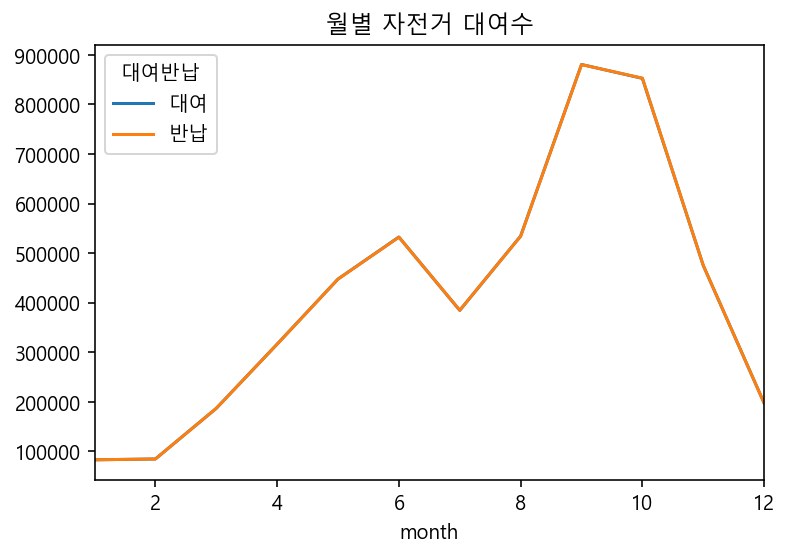

In [43]:
#대용량 데이터일 경우 pandas로 시각화 하는 것이 속도가 더 빠름
df_month_pivot.plot(title='월별 자전거 대여수', rot=0)

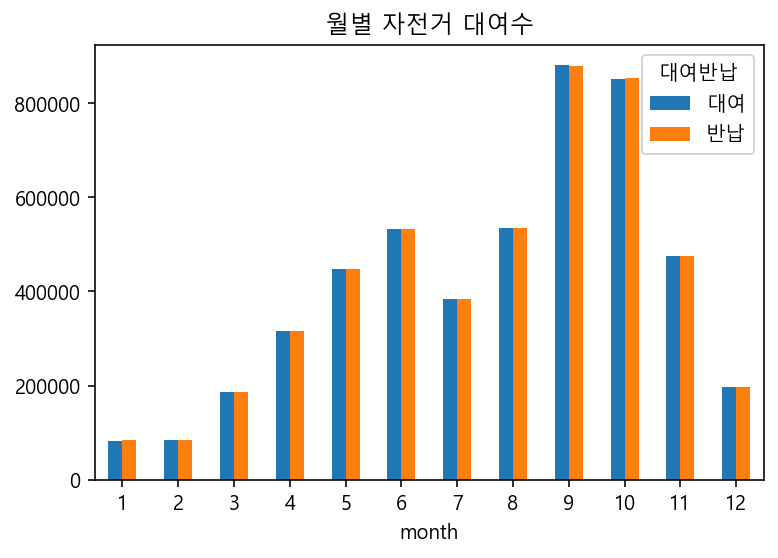

In [44]:
# barplot으로 나타내기
df_month_pivot.plot.bar(title='월별 자전거 대여수', rot=0)

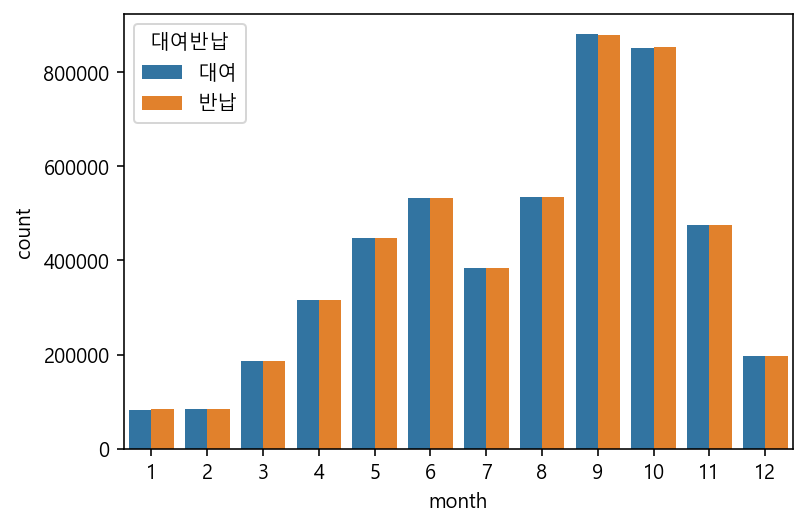

In [45]:
# seaborn을 이용해서 barplot그리기
sns.barplot(data=df_month, x='month', y='count', hue='대여반납')

## 일자별 대여|반납 현황

In [46]:
df_day_1 = df['대여일'].value_counts().reset_index()
df_day_1.columns = ['day', 'count']

df_day_1 = df_day_1.sort_values('day')
df_day_1['대여반납'] = '대여'
print(df_day_1.shape)

(31, 3)


In [47]:
df_day_2 = df['반납일'].value_counts().reset_index()
df_day_2.columns = ['day', 'count']
df_day_2 = df_day_2.sort_values('day')
df_day_2['대여반납'] = '반납'
print(df_day_2.shape)

(31, 3)


In [48]:
df_day = pd.concat([df_day_1, df_day_2])
print(df_day.shape)
df_day.head()

(62, 3)


,day,count,대여반납
23,1,154932,대여
21,2,157629,대여
17,3,162868,대여
12,4,168409,대여
27,5,145796,대여


### pivot table로 일별 대여반납 합계 구하기

In [49]:
df_day_pivot =  df_day.pivot_table(index=['day'],
                                       columns=['대여반납'], 
                                       values='count', aggfunc=sum)
df_day_pivot.head()

대여반납,대여,반납
day,,
1,154932,155933
2,157629,156797
3,162868,163263
4,168409,168192
5,145796,146224


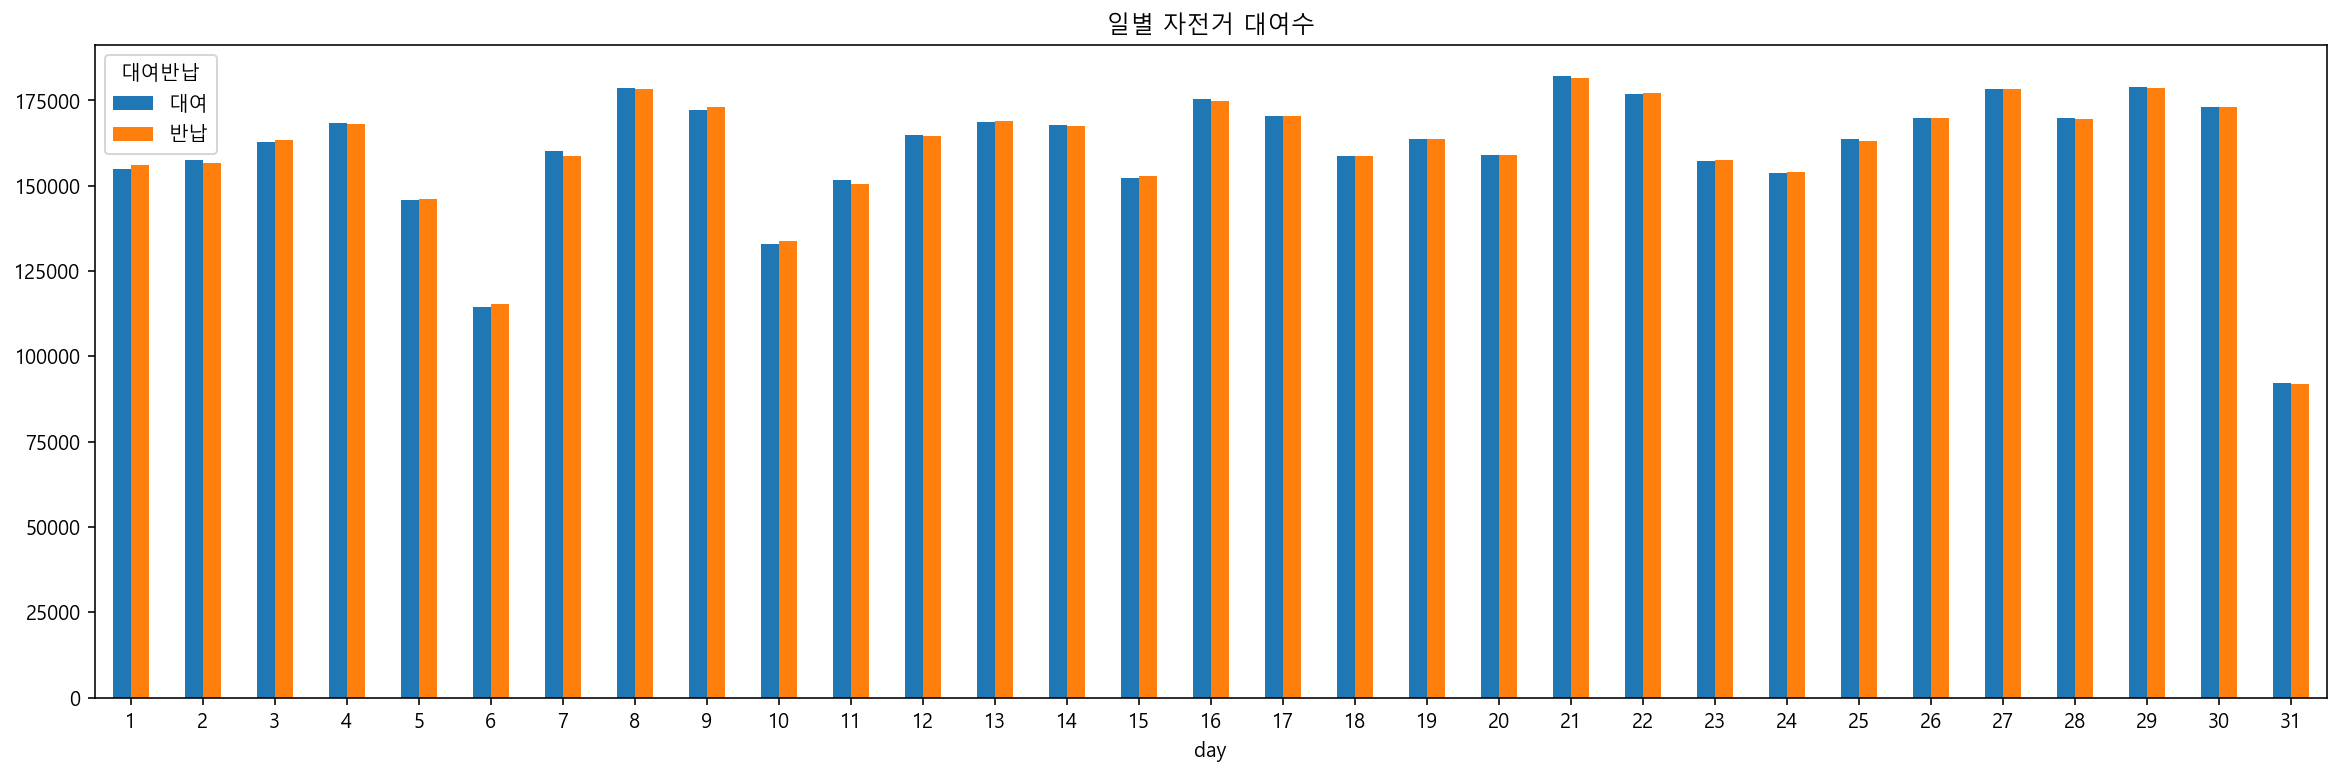

In [50]:
df_day_pivot.plot.bar(title='일별 자전거 대여수', rot=0, figsize=(20, 6))

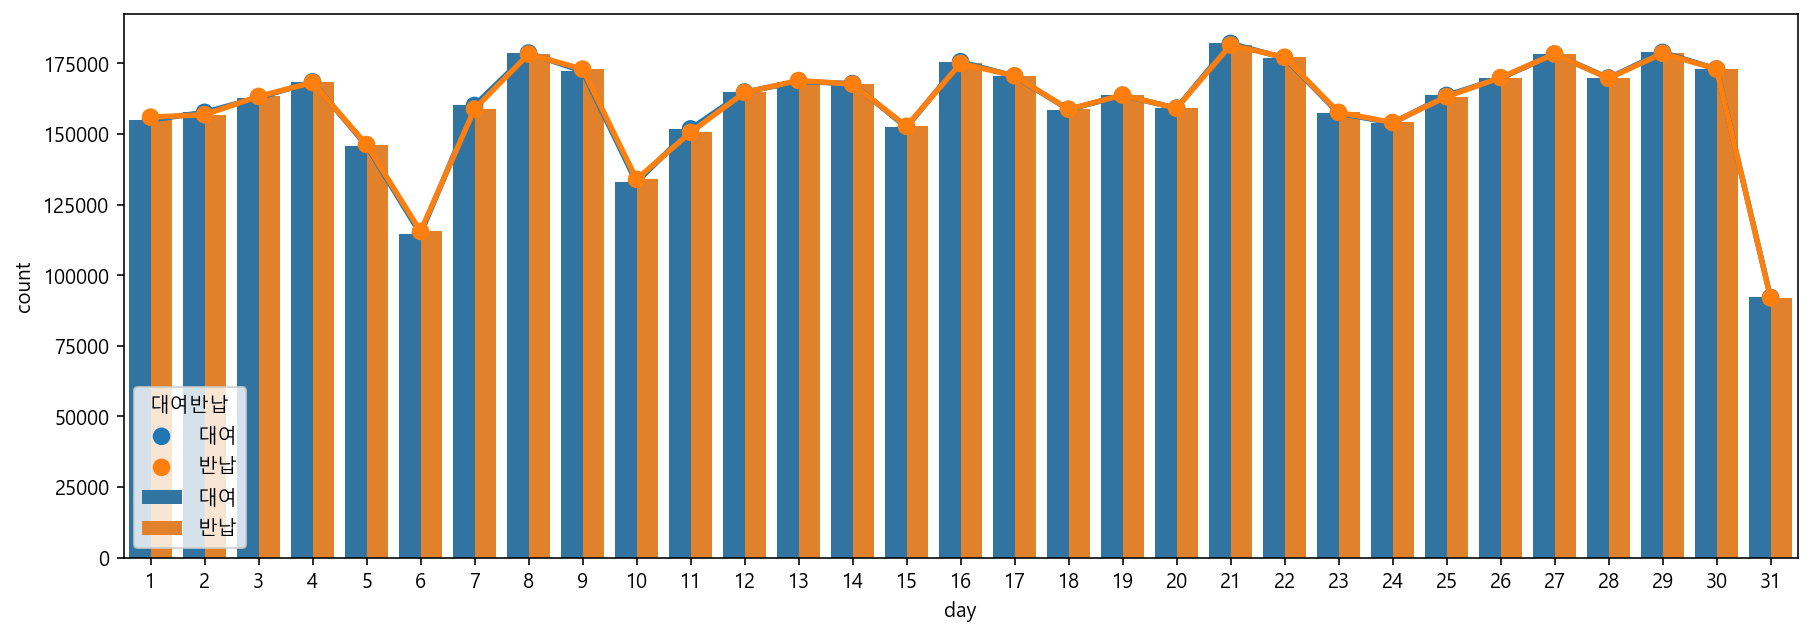

In [51]:
# seaborn으로 pointplot, barplot그리기
plt.figure(figsize=(15, 5))
sns.pointplot(data=df_day, x='day', y='count', hue='대여반납')
sns.barplot(data=df_day, x='day', y='count', hue='대여반납')

### 해당연도 날짜 전체를 보기

In [52]:
df_ymd_1 = df['대여년월일'].value_counts().reset_index()
df_ymd_1.columns = ['date', 'count']

df_ymd_1 = df_ymd_1.sort_values('date')
df_ymd_1['대여반납'] = '대여'
print(df_ymd_1.shape)

(365, 3)


In [53]:
df_ymd_2 = df['반납년월일'].value_counts().reset_index()
df_ymd_2.columns = ['date', 'count']
df_ymd_2 = df_ymd_2.sort_values('date')
df_ymd_2['대여반납'] = '반납'
print(df_ymd_2.shape)

(366, 3)


In [54]:
df_ymd = pd.concat([df_ymd_1, df_ymd_2])
print(df_ymd.shape)
df_ymd.head()

(731, 3)


,date,count,대여반납
341,2017-01-01,2286,대여
307,2017-01-02,3748,대여
300,2017-01-03,3975,대여
286,2017-01-04,4580,대여
290,2017-01-05,4444,대여


In [55]:
# 시간데이터로 나타내기 위해 타입 변경
# 데이터 시각화 할 때 데이터 타입에 따라 표현이 달라지므로
df_ymd["date"] = pd.to_datetime(df_ymd["date"])
df_ymd["yymmdd"] = df_ymd["date"].dt.date

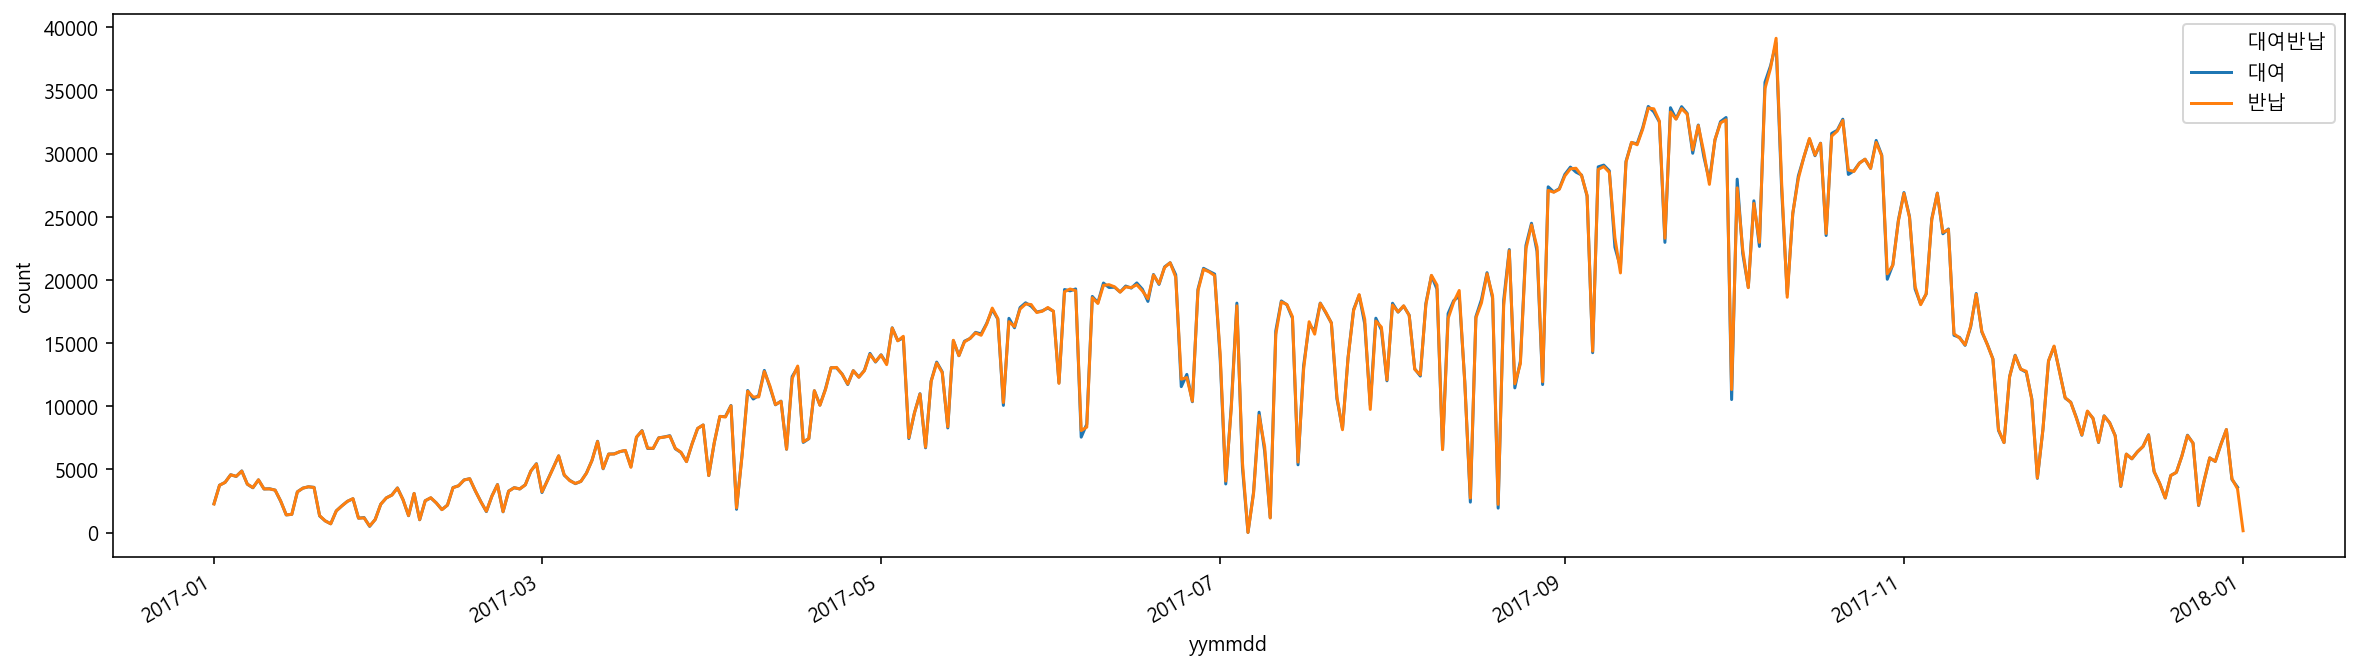

In [56]:
# 따릉이 대여/반납 수 seaborn으로 lineplot그리기
plt.figure(figsize=(20, 5))
plt.xticks(rotation=30, ha='right')
sns.lineplot(data=df_ymd, x='yymmdd', y='count', hue='대여반납')

In [57]:
# 최근 데이터를 불러오기 위해 날짜 기준 정렬
df_ymd = df_ymd.sort_values(by="yymmdd")
df_ymd.head()

,date,count,대여반납,yymmdd
341,2017-01-01,2286,대여,2017-01-01
341,2017-01-01,2260,반납,2017-01-01
307,2017-01-02,3745,반납,2017-01-02
307,2017-01-02,3748,대여,2017-01-02
301,2017-01-03,3973,반납,2017-01-03


**대여수가 갑자기 줄어드는 날짜 존재** 

**날씨를 조회를 통해 해당 날짜에 비가 많이 내리거나 날씨가 좋지 않은 날짜임을 발견**

## 요일별 대여|반납 현황
**대여|반납별로 어떤 요일에 주로 대여반납이 되는지 시각화해보기 위해 Tidy Data를 만들기**

In [58]:
df_dow_1 = df['대여요일'].value_counts().reset_index()
df_dow_1.columns = ['dayofweek', 'count']
df_dow_1 = df_dow_1.sort_values('dayofweek')
df_dow_1['대여반납'] = '대여'
print(df_dow_1.shape)

(7, 3)


In [59]:
df_dow_2 = df['반납요일'].value_counts().reset_index()
df_dow_2.columns = ['dayofweek', 'count']
df_dow_2 = df_dow_2.sort_values('dayofweek')
df_dow_2['대여반납'] = '반납'
print(df_dow_2.shape)

(7, 3)


In [60]:
df_dow = pd.concat([df_dow_1, df_dow_2]).reindex()
print(df_dow.shape)

(14, 3)


In [61]:
df_dow.head()

,dayofweek,count,대여반납
5,0,699562,대여
2,1,723224,대여
4,2,705605,대여
0,3,743750,대여
1,4,741236,대여


In [62]:
df_dow.tail()

,dayofweek,count,대여반납
4,2,705467,반납
0,3,742565,반납
1,4,738647,반납
3,5,716354,반납
6,6,650574,반납


In [63]:
# apply를 활용해서 숫자로 된 요일을 월화수목금토로 변경
weekday_map = {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
df_dow['weekday'] = df_dow['dayofweek'].apply(lambda x : weekday_map[x])
df_dow[['dayofweek', 'weekday']].head()

,dayofweek,weekday
5,0,월
2,1,화
4,2,수
0,3,목
1,4,금


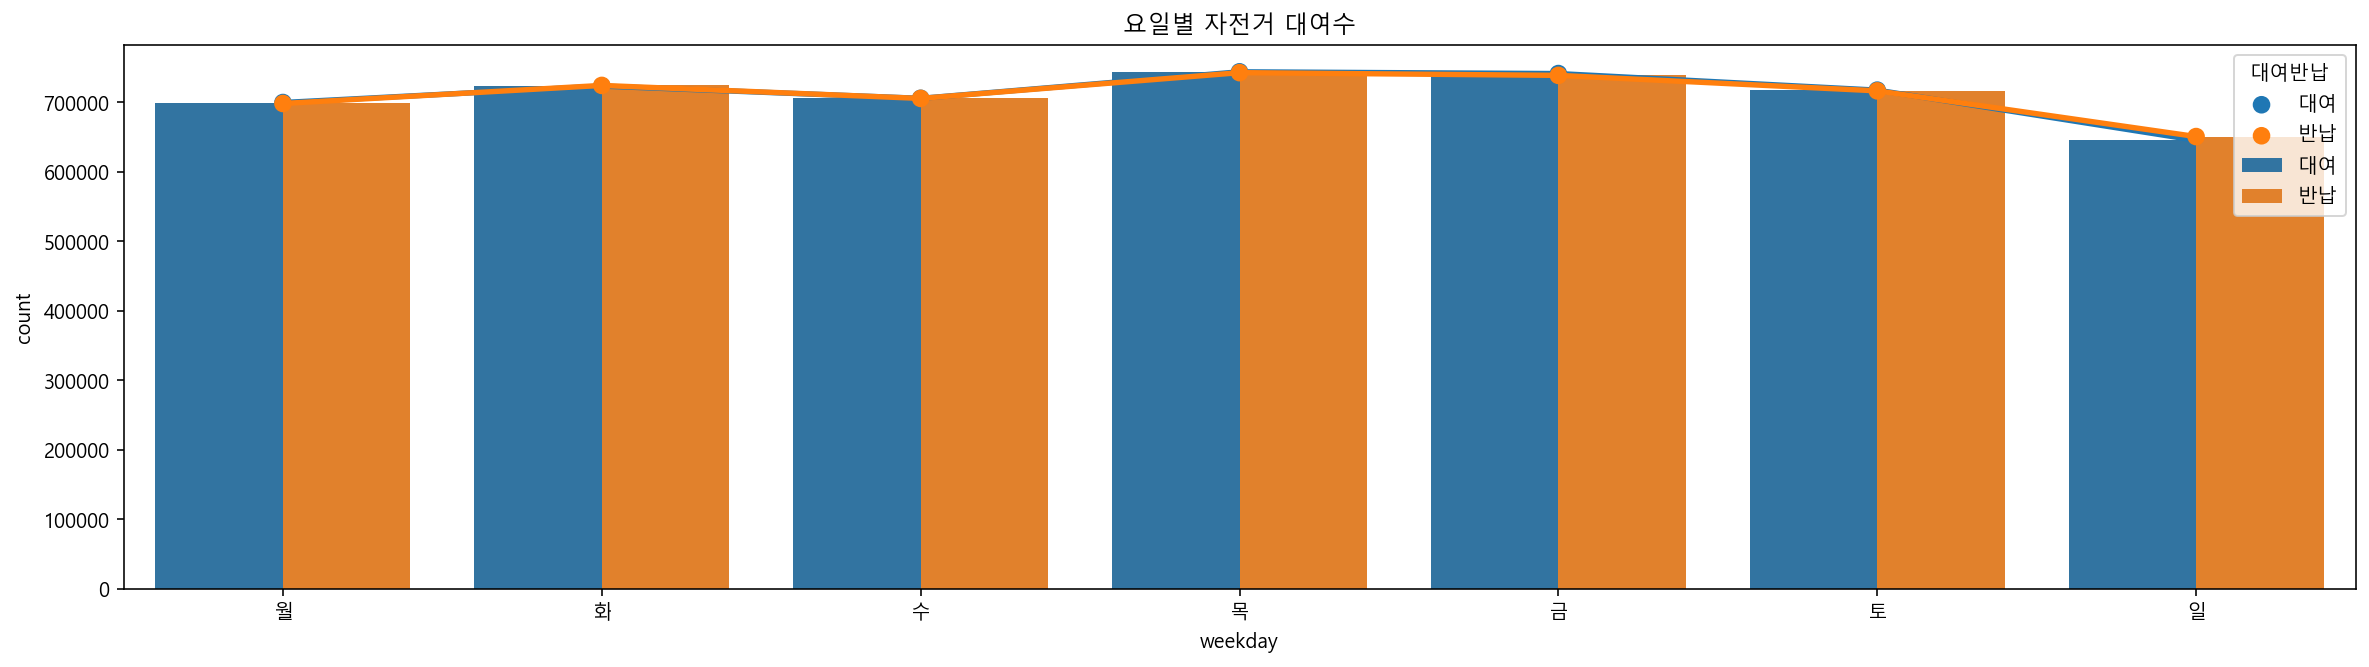

In [64]:
plt.figure(figsize=(20, 5))
plt.title("요일별 자전거 대여수")
sns.pointplot(data=df_dow, x="weekday", y="count", hue="대여반납")
sns.barplot(data=df_dow, x="weekday", y="count", hue="대여반납")

## 시간대별 대여|반납량

In [65]:
df_hour_1 = df['대여시'].value_counts().reset_index()
df_hour_1.columns = ['hour', 'count']
df_hour_1 = df_hour_1.sort_values('hour')
df_hour_1['대여반납'] = '대여'
df_hour_1.head()

,hour,count,대여반납
16,0,143797,대여
18,1,106580,대여
19,2,73113,대여
21,3,47718,대여
23,4,31591,대여


In [66]:
df_hour_2 = df['반납시'].value_counts().reset_index()
df_hour_2.columns = ['hour', 'count']
df_hour_2 = df_hour_2.sort_values('hour')
df_hour_2['대여반납'] = '반납'
df_hour_2.head()

,hour,count,대여반납
14,0,167952,반납
18,1,124084,반납
19,2,88629,반납
20,3,57045,반납
22,4,39078,반납


In [67]:
df_hour = pd.concat([df_hour_1, df_hour_2])
df_hour.head()

,hour,count,대여반납
16,0,143797,대여
18,1,106580,대여
19,2,73113,대여
21,3,47718,대여
23,4,31591,대여


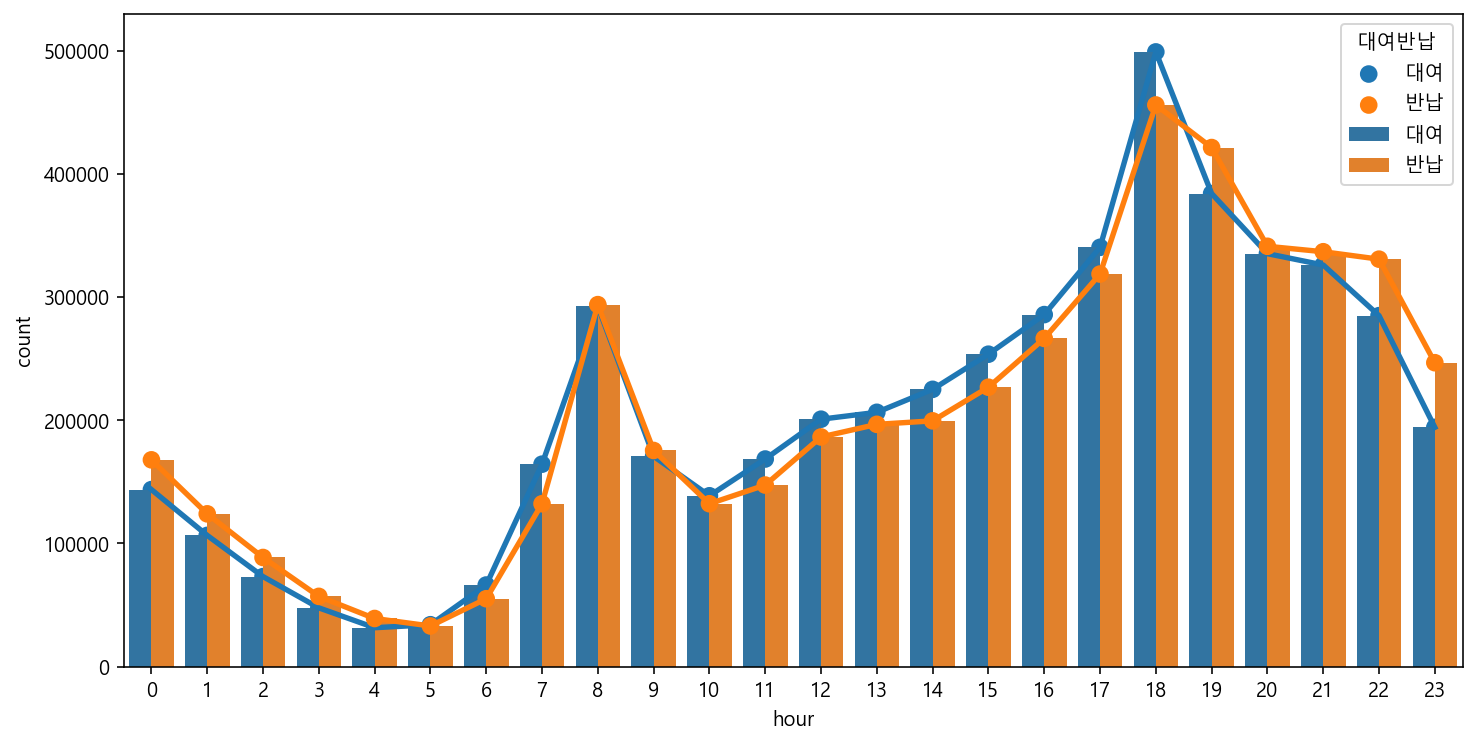

In [68]:
# 시간대별 자전거 대여수
plt.figure(figsize=(12,6))
sns.pointplot(data=df_hour, x="hour", y="count", hue="대여반납")
sns.barplot(data=df_hour, x="hour", y="count", hue="대여반납")

**위 그래프로 알 수 있는 사실**
* 새벽시간대로 갈수록 대여/반납 수가 줄어드는 추세
* 출근시간대 대여가 반납보다 많음
* 오전에는 8시대에 대여/반납이 많으며, 오후시간대에는 18시에 대여/반납이 가장 많다.
* 오전 11시부터 20시까지는 대여가 반납보다 많다.(대여>반납)
* 21시 이후부터 오전 4시까지는 대여보다 반납이 많다.(대여<반납)

In [69]:
df_minute_1 = df['대여분'].value_counts().reset_index()
df_minute_1.columns = ['minute', 'count']
df_minute_1 = df_minute_1.sort_values('minute')
df_minute_1['대여반납'] = '대여'
print(df_minute_1.shape)

(60, 3)


In [70]:
df_minute_2 = df['반납분'].value_counts().reset_index()
df_minute_2.columns = ['minute', 'count']
df_minute_2 = df_minute_2.sort_values('minute')
df_minute_2['대여반납'] = '반납'
print(df_minute_2.shape)

(60, 3)


In [71]:
df_minute = pd.concat([df_minute_1, df_minute_2])
print(df_minute.shape)

(120, 3)


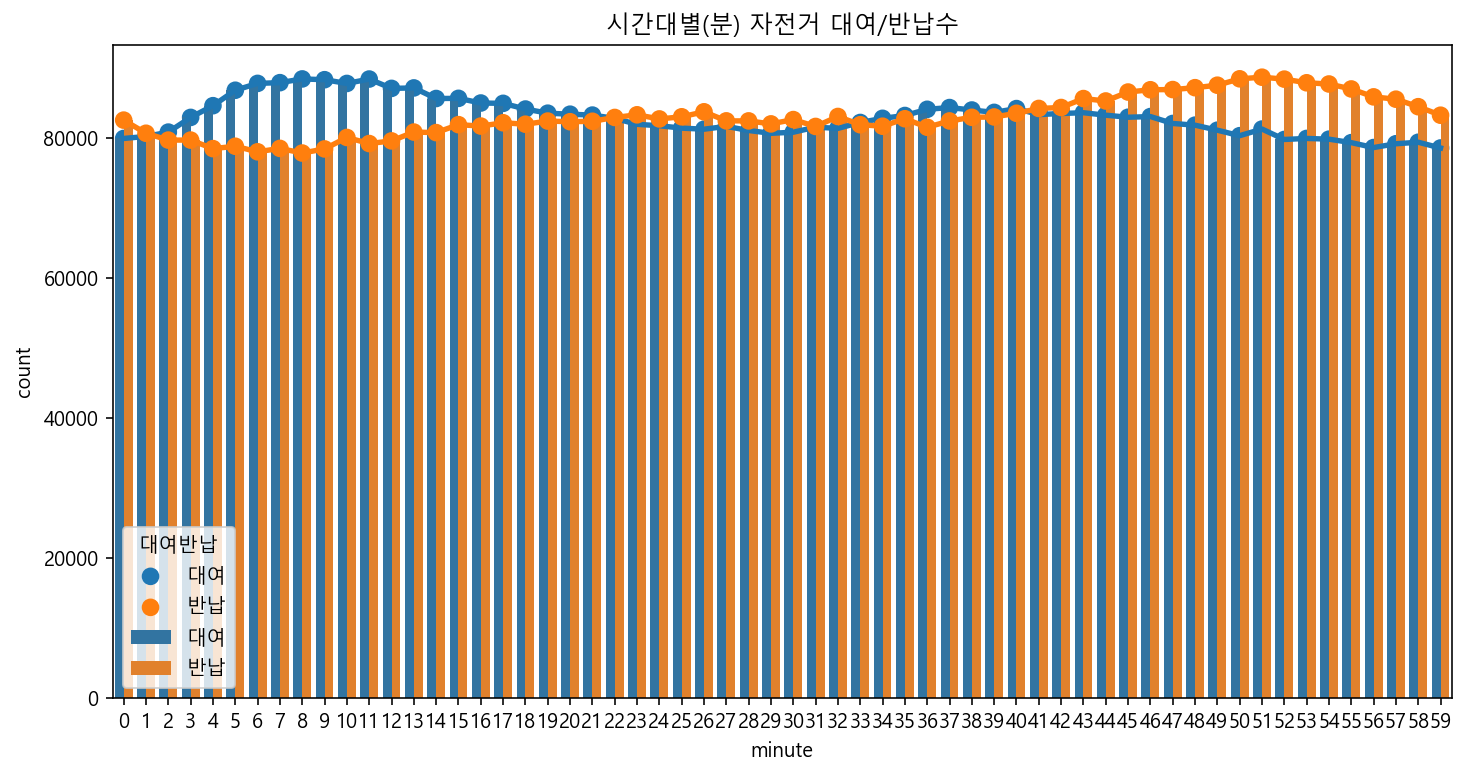

In [72]:
# 분별 자전거 대여수
plt.figure(figsize=(12,6))
plt.title('시간대별(분) 자전거 대여/반납수')
sns.pointplot(data=df_minute, x="minute", y="count", hue="대여반납")
sns.barplot(data=df_minute, x="minute", y="count", hue="대여반납")

* 대여/반납이 거의 비슷하게 이루어지고 있지만 대여는 0 ~ 20분 사이에 더 많이 일어나며 반납은 40 ~ 60분 사이에 더 많이 일어난다.

## 대여와 반납은 같은 곳에서 이루어지고 있을까?

In [73]:
# 같은대여반납소라는 컬럼을 새로 만들고 
#대여반납이 같은 곳에서 이루어지고 있는지 여부 추가
df['같은대여반납소'] = df['대여대여소명'] == df['반납대여소명']

In [74]:
df_location_diff = df['같은대여반납소'].value_counts().reset_index()
df_location_diff.columns = ['일치여부', '대여반납수']
df_location_diff

,일치여부,대여반납수
0,False,4358021
1,True,617933


In [75]:
# 같은|다른 반납소별로 대여반납수가 몇 배나 차이가 나는지 확인
location_diff_ratio = df_location_diff['대여반납수'][0]/df_location_diff['대여반납수'][1]
print(f'같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 {location_diff_ratio:.2f}배 많다.')
df_location_diff

같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 7.05배 많다.


,일치여부,대여반납수
0,False,4358021
1,True,617933


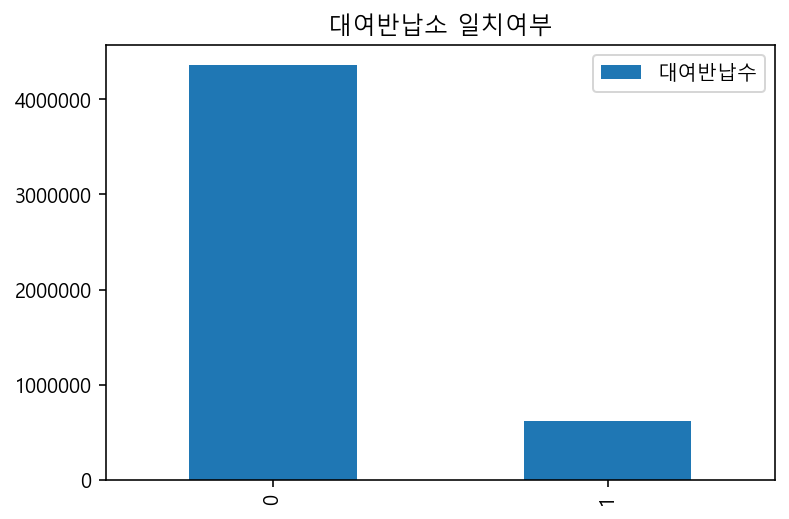

In [76]:
# "대여반납소 일치여부"
# df_location_diff 로 계산한 결과를 pandas의 bar plot으로 그리기
df_location_diff.plot.bar(title="대여반납소 일치여부")

같은 곳에서 대여반납을 하는 것보다 다른 곳으로의 대여반납이 훨씬 많은 것을 확인할 수 있다.

In [77]:
# 같은 대여반납소인 데이터프레임을 df_same_loc 라는 변수에 추가
df_same_loc = df[df['같은대여반납소'] == True]
df_same_loc.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여분,대여요일,반납년월일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
7,SPB-03383,2017-01-01 00:06:00,175,홍연2교옆,1,2017-01-01 01:07:00,175,홍연2교옆,1,60,...,6,6,2017-01-01,2017,1,1,1,7,6,True
20,SPB-00872,2017-01-01 00:13:00,327,낙원상가 옆,1,2017-01-01 00:32:00,327,낙원상가 옆,4,18,...,13,6,2017-01-01,2017,1,1,0,32,6,True
29,SPB-01165,2017-01-01 00:19:00,112,극동방송국 앞,10,2017-01-01 00:34:00,112,극동방송국 앞,4,14,...,19,6,2017-01-01,2017,1,1,0,34,6,True
30,SPB-04626,2017-01-01 00:19:00,112,극동방송국 앞,4,2017-01-01 00:34:00,112,극동방송국 앞,2,14,...,19,6,2017-01-01,2017,1,1,0,34,6,True
47,SPB-00114,2017-01-01 00:35:00,307,서울역사박물관 앞,5,2017-01-01 00:49:00,307,서울역사박물관 앞,6,14,...,35,6,2017-01-01,2017,1,1,0,49,6,True


In [78]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소(대여|반납 건 수)

df_same_loc['대여대여소명'].value_counts().head()

 여의나루역 1번출구 앞     18472
 뚝섬유원지역 1번출구 앞    13268
 월드컵공원             8096
 서울숲역 4번 출구 옆      7182
 마포구민체육센터 앞        6334
Name: 대여대여소명, dtype: int64

* 같은 곳에서 대여반납이 이루어지는 대여소들은 한강주변이나 공원 주변에 위치한 것을 확인해 볼 수 있다.

## 같은|다른 대여소에서 대여가 되는 자전거의 평균 이용시간
### 같은 대여반납소

In [79]:
same_loc_mean_time = df_same_loc['이용시간(분)'].mean()
print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', same_loc_mean_time)

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  54.74785777746131


In [80]:
# pivot_table을 통해 '대여대여소명', '대여대여소번호', '반납대여소명'을 기준으로 
# 평균이용시간과 횟수를 구하기
df_same_pivot = df_same_loc.pivot_table(index=['대여대여소명', '대여대여소번호', '반납대여소명'],
                        values="이용시간(분)",
                       aggfunc=[np.mean, np.sum]).reset_index()
df_same_pivot.columns = ['대여대여소명', '대여대여소번호', '반납대여소명', '평균이용시간', '이용횟수']
df_same_pivot.head(1)

,대여대여소명,대여대여소번호,반납대여소명,평균이용시간,이용횟수
0,강동구청 앞,1024,강동구청 앞,40.782609,938


In [81]:
# 평균이용시간이 높은 순으로 정렬
df_same_pivot.sort_values(by='평균이용시간', ascending=False).head(10)

,대여대여소명,대여대여소번호,반납대여소명,평균이용시간,이용횟수
620,신사동 가로수길 입구,2362,신사동 가로수길 입구,232.555556,2093
924,한국종합기술사옥 앞,1023,한국종합기술사옥 앞,175.000000,875
38,e 편한세상 보문아파트 내,1352,e 편한세상 보문아파트 내,93.000000,186
914,하나로마트 창동점,1716,하나로마트 창동점,91.500000,183
537,서초4동주민센터,2268,서초4동주민센터,86.400000,432
135,구로1동우체국 앞,1979,구로1동우체국 앞,84.000000,84
1015,이수역 4번 출구,2230,이수역 4번 출구,82.822785,39258
500,서울 월드컵 경기장,199,서울 월드컵 경기장,82.788280,131385
840,중곡역 1번출구,3502,중곡역 1번출구,80.500000,644
379,미아역 1번 출구 뒤,1527,미아역 1번 출구 뒤,80.066667,1201


In [82]:
# 이용횟수가 많은 곳으로 정렬
df_same_pivot.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,대여대여소번호,반납대여소명,평균이용시간,이용횟수
679,여의나루역 1번출구 앞,207,여의나루역 1번출구 앞,69.272142,1279595
292,뚝섬유원지역 1번출구 앞,502,뚝섬유원지역 1번출구 앞,60.914154,808209
516,서울숲역 4번 출구 옆,511,서울숲역 4번 출구 옆,66.991924,481136
752,월드컵공원,186,월드컵공원,59.284461,479967
318,마포구민체육센터 앞,152,마포구민체육센터 앞,55.294127,350233
5,CJ 드림시티,907,CJ 드림시티,70.487214,264609
90,"고속터미널역 8-1번, 8-2번 출구 사이",2219,"고속터미널역 8-1번, 8-2번 출구 사이",79.980693,260977
718,옥수역 3번출구,565,옥수역 3번출구,56.982723,247362
224,당산육갑문,272,당산육갑문,63.043634,247068
726,외국어대 정문 앞,634,외국어대 정문 앞,58.977503,238564


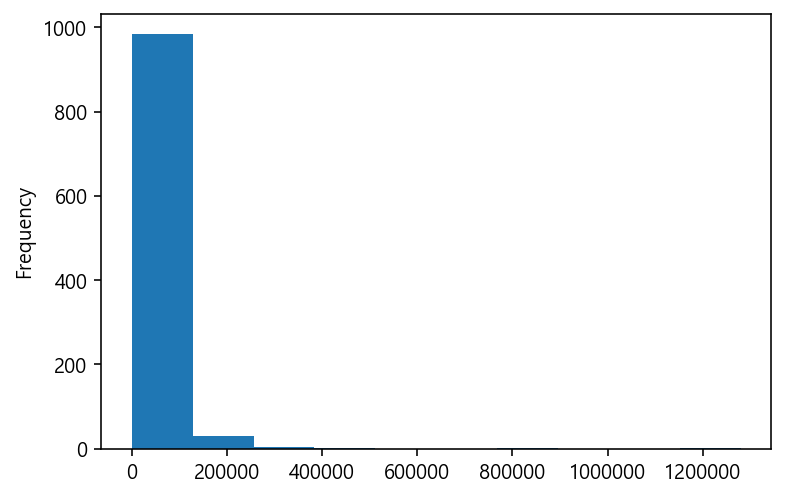

In [83]:
df_same_pivot['이용횟수'].plot.hist()

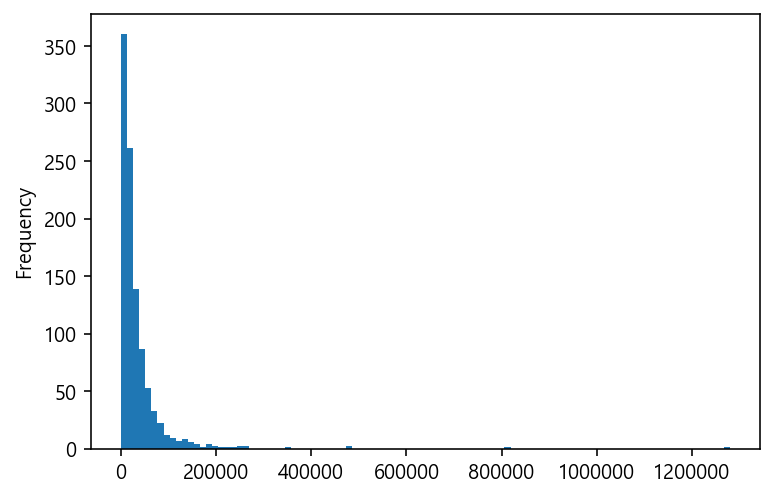

In [84]:
df_same_pivot['이용횟수'].plot.hist(bins=100)

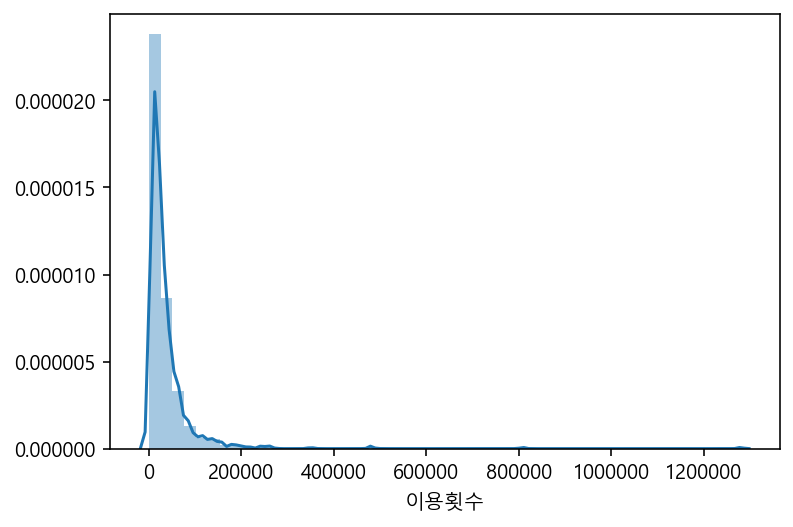

In [85]:
sns.distplot(df_same_pivot['이용횟수'])

### 다른 대여|반납소

In [86]:
df_diff_loc = df.loc[df['같은대여반납소'] == False]
df_diff_loc.shape

(4358021, 26)

In [87]:
diff_loc_mean_time = df_diff_loc['이용시간(분)'].mean()
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', 
      df_diff_loc['이용시간(분)'].mean())

다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  24.96120073767428


In [88]:
# pivot_table을 통해 '대여대여소명', '대여대여소번호', '반납대여소명'을 기준으로 
# 평균이용시간과 횟수 구하기
df_diff = df_same_loc.pivot_table(index=['대여대여소명', '대여대여소번호', '반납대여소명'],
                        values="이용시간(분)",
                       aggfunc=[np.mean, np.sum]).reset_index()
df_diff.columns = ['대여대여소명', '대여대여소번호', '반납대여소명', '평균이용시간', '이용횟수']
df_diff.head(1)

,대여대여소명,대여대여소번호,반납대여소명,평균이용시간,이용횟수
0,강동구청 앞,1024,강동구청 앞,40.782609,938


In [89]:
df_diff.sort_values(by='평균이용시간', ascending=False).head(10)

,대여대여소명,대여대여소번호,반납대여소명,평균이용시간,이용횟수
620,신사동 가로수길 입구,2362,신사동 가로수길 입구,232.555556,2093
924,한국종합기술사옥 앞,1023,한국종합기술사옥 앞,175.000000,875
38,e 편한세상 보문아파트 내,1352,e 편한세상 보문아파트 내,93.000000,186
914,하나로마트 창동점,1716,하나로마트 창동점,91.500000,183
537,서초4동주민센터,2268,서초4동주민센터,86.400000,432
135,구로1동우체국 앞,1979,구로1동우체국 앞,84.000000,84
1015,이수역 4번 출구,2230,이수역 4번 출구,82.822785,39258
500,서울 월드컵 경기장,199,서울 월드컵 경기장,82.788280,131385
840,중곡역 1번출구,3502,중곡역 1번출구,80.500000,644
379,미아역 1번 출구 뒤,1527,미아역 1번 출구 뒤,80.066667,1201


In [90]:
df_diff.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,대여대여소번호,반납대여소명,평균이용시간,이용횟수
679,여의나루역 1번출구 앞,207,여의나루역 1번출구 앞,69.272142,1279595
292,뚝섬유원지역 1번출구 앞,502,뚝섬유원지역 1번출구 앞,60.914154,808209
516,서울숲역 4번 출구 옆,511,서울숲역 4번 출구 옆,66.991924,481136
752,월드컵공원,186,월드컵공원,59.284461,479967
318,마포구민체육센터 앞,152,마포구민체육센터 앞,55.294127,350233
5,CJ 드림시티,907,CJ 드림시티,70.487214,264609
90,"고속터미널역 8-1번, 8-2번 출구 사이",2219,"고속터미널역 8-1번, 8-2번 출구 사이",79.980693,260977
718,옥수역 3번출구,565,옥수역 3번출구,56.982723,247362
224,당산육갑문,272,당산육갑문,63.043634,247068
726,외국어대 정문 앞,634,외국어대 정문 앞,58.977503,238564


In [91]:
rent_mean_time = same_loc_mean_time - diff_loc_mean_time
print(f'같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 {rent_mean_time:.2f} 분 많다.')

같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 29.79 분 많다.


## 해당 기간동안 가장 많이 이용된 자전거는 몇 회 대여 되었을까?

### describe를 통해 가장 많이 대여된 자전거번호 구하기

In [92]:
# describe으로 자전거번호를 요약하여 가장 많이 대여된 자전거의 대여 횟수 구하기
bike_describe = df['자전거번호'].describe()
print('대여된 자전거 수 :', bike_describe[1])
print('가장 많이 대여된 자전거 번호 :', bike_describe[2])
print('가장 많이 대여된 자전거의 대여횟수 :', bike_describe[3])
bike_describe

대여된 자전거 수 : 13014
가장 많이 대여된 자전거 번호 : SPB-05917
가장 많이 대여된 자전거의 대여횟수 : 983


count       4975954
unique        13014
top       SPB-05917
freq            983
Name: 자전거번호, dtype: object

### value_counts를 통해 가장 많이 대여된 자전거번호 구하기

In [93]:
# 자전거 번호별 대여수를 구해서 데이터프레임으로 만들기 
#bike_rent_counts 변수에 추가
bike_rent_counts = df['자전거번호'].value_counts().reset_index()
bike_rent_counts.columns = ['자전거번호', '대여수']
bike_rent_counts.head(1)

,자전거번호,대여수
0,SPB-05917,983


In [94]:
print('해당 기간동안 자전거 하나당 평균 대여 수:', bike_rent_counts['대여수'].mean())
print('자전거 하나당 가장 많이 대여된 횟수:', bike_rent_counts['대여수'].max())
print('자전거 하나당 가장 적게 대여된 횟수:', bike_rent_counts['대여수'].min())

해당 기간동안 자전거 하나당 평균 대여 수: 382.35392654064856
자전거 하나당 가장 많이 대여된 횟수: 983
자전거 하나당 가장 적게 대여된 횟수: 1


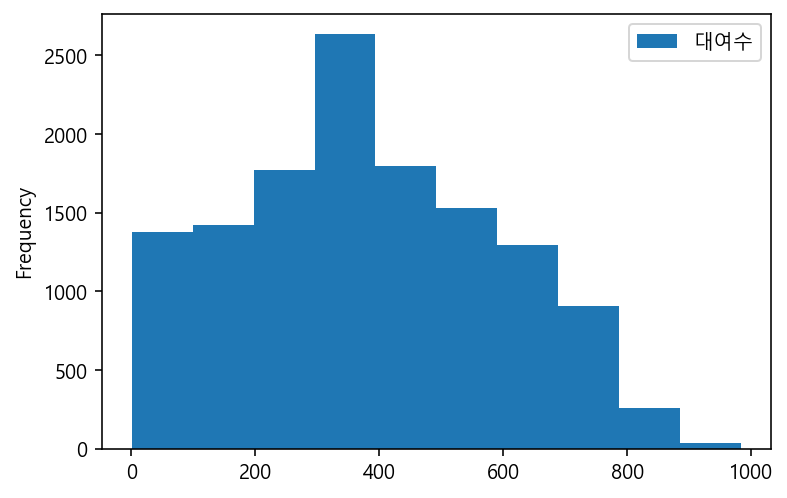

In [95]:
# Pandas 로 자전거 대여 횟수에 대한 히스토그램 그리기
bike_rent_counts.plot.hist()

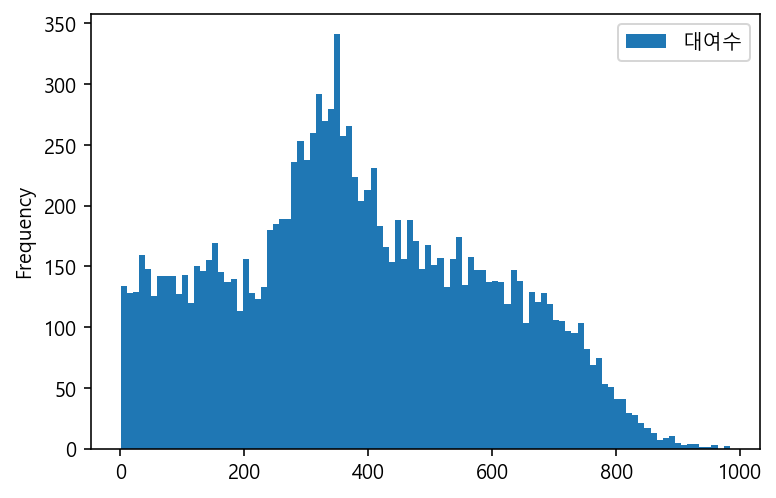

In [96]:
# bin의 갯수를 늘리기
bike_rent_counts.plot.hist(bins=100)

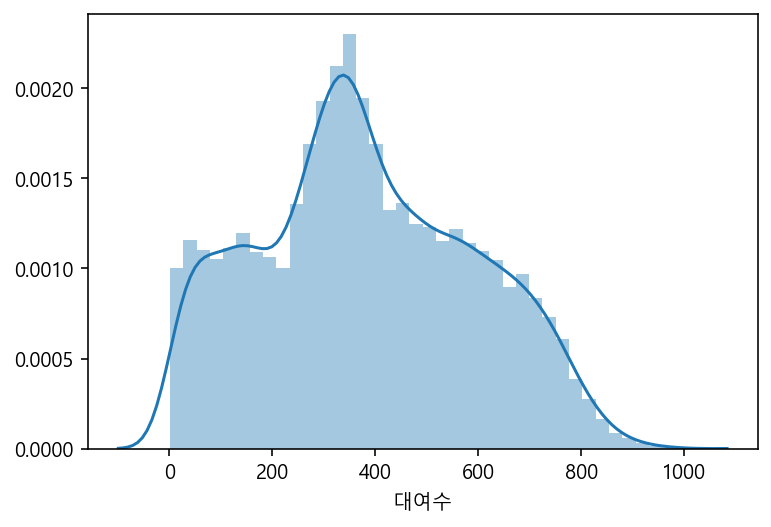

In [97]:
# seaborn 의 distplot으로 자전거 하나당 특정 기간동안 대여된 횟수를 그리기
sns.distplot(bike_rent_counts["대여수"])

In [98]:
# 가장 많이 대여된 자전거의 대여이력을 most_bike_df 변수에 추가
most_bike_df = df.loc[df['자전거번호'] == bike_describe[2]]
most_bike_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여분,대여요일,반납년월일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
583954,SPB-05917,2017-04-24 09:56:07,326,안국역 5번출구 앞,16,2017-04-24 10:21:36,171,임광빌딩 앞,3,25,...,56,0,2017-04-24,2017,4,24,10,21,0,False
585546,SPB-05917,2017-04-24 13:24:11,171,임광빌딩 앞,3,2017-04-24 13:45:24,328,탑골공원 앞,8,21,...,24,0,2017-04-24,2017,4,24,13,45,0,False
586441,SPB-05917,2017-04-24 15:05:45,328,탑골공원 앞,8,2017-04-24 15:23:55,358,성대입구 사거리,1,17,...,5,0,2017-04-24,2017,4,24,15,23,0,False
593364,SPB-05917,2017-04-24 23:03:12,358,성대입구 사거리,1,2017-04-24 23:32:15,579,마장역 4번출구,8,28,...,3,0,2017-04-24,2017,4,24,23,32,0,False
597822,SPB-05917,2017-04-25 12:26:16,579,마장역 4번출구,7,2017-04-25 12:37:14,525,한양대병원사거리,17,10,...,26,1,2017-04-25,2017,4,25,12,37,1,False


In [100]:
# 가장많이 대여된 자전거의 대여이력에서 대여대여소명별로 횟수를 셉니다.
most_bike_df['대여대여소명'].value_counts().head()

 홍대입구역 2번출구 앞    15
 봉림교 교통섬         11
 성대입구 사거리        11
 여의나루역 1번출구 앞     9
 홍연2교옆            8
Name: 대여대여소명, dtype: int64

In [101]:
# 가장많이 대여된 자전거가 거쳐간 대여소를 시각화 하기 위해 
# unique 를 통해 대여소가 중복되지 않게 구하기
rent_station = most_bike_df['대여대여소명'].unique()
rent_station

array([' 안국역 5번출구 앞', ' 임광빌딩 앞', ' 탑골공원 앞', ' 성대입구 사거리', ' 마장역 4번출구',
       ' 한양대병원사거리', ' 용두동 사거리', ' 동대입구역 6번출구 뒤', ' 약수역 10번출구 앞',
       ' 신설동역8번출구', ' SK 서린빌딩 앞', ' 청운초교 앞 삼거리', ' 국민은행 연서지점', ' 메뚜기다리',
       ' 은평역사한옥박물관', ' 은평뉴타운 푸르지오', ' 신도고등학교', ' 구 서부경찰서 건너편',
       ' 새절역 2번출구', ' 예일여중', ' 상수역 2번출구 앞', ' 충정2교', ' 세운스퀘어 앞',
       ' 종로구청 옆', ' 여의나루역 1번출구 앞', ' 신길삼거리(우리은행)', ' 영등포청과시장 사거리',
       ' 당산역 10번출구 앞', ' 여의도역 4번출구 옆', ' 서울지방병무청 버스정류장', ' 진주아파트상가 앞',
       ' 유진투자증권빌딩 앞', ' 시범아파트버스정류장 옆', ' 여의도초교 앞', ' 양서중학교 옆',
       ' 신정3동주민센터', ' 목4동주민센터 옆', ' 합정역 7번출구 앞', ' 망원2빗물펌프장 앞',
       ' 증산역 4번출구', ' 명물길 원형무대 앞', ' 신수동 사거리', ' 신성기사식당 앞',
       ' 서강대역 2번출구 앞', ' 연대 대운동장 옆', ' 서대문소방서', ' 용강동 주민센터 앞',
       ' 마포역 1번출구 뒤', ' 문래동자이아파트 앞', ' 서교동 사거리', ' 선유도역 3번출구 앞',
       ' 극동방송국 앞', ' 청계천 한빛광장', ' 공덕역 2번출구', ' 신촌역(2호선) 7번출구 앞',
       ' 광흥창역 2번출구 앞', ' 신촌역(2호선) 6번출구 옆', ' 홍대입구역 2번출구 앞',
       ' 애오개역 4번출구 앞', ' 서울숲 남문 버스정류소 옆', ' 서울숲역 2번출구 앞', ' 비전교회 앞',
       ' 군자지하보도 앞